# Feedforward Neural Networks
![FNN](https://upload.wikimedia.org/wikipedia/commons/0/00/Multi-Layer_Neural_Network-Vector-Blank.svg)

## Introduction

An artificial neural network (ANN) is a machine learning model inspired by the biological brain. It consists of interconnected nodes that performs an operation on a piece of data that can be tuned to output something specific. You can think of the individual nodes of an ANN as the neurons in a brain and the connections between them as the synapses. Training the ANN means that we increase or decrease the strength of different connections until we achieve some desired behavior. 

The most common type of ANN is a feedforward neural network (FNN). It consists of nodes that are organized into layers: the input layer, the hidden layer(s), and the output layer. The nodes within a given layer have no connections between them, as seen in the picture above. Each layer can only pass information to the subsequent layer only, which is why FNNs has 'feedforward' in the name.

Feedforward neural networks are powerful tools that can be applied to supervised, unsupervised, and reinforcement learning problems. They are especially useful when dealing with large amounts of nonlinear data. However, they can be computationally heavy compared to many of the algorithms we have discussed so far, so they [shouldn't be used](https://medium.datadriveninvestor.com/when-not-to-use-neural-networks-89fb50622429) if a simpler algorithm does the job. 

## Mathematical Foundation

### Notation

For demonstration purposes, let's assume our network has only **one hidden layer** and only **one output**. This will help make the math a little easier to write down, but the general idea still holds for deeper networks and for networks with multiple outputs. You would just have to change the notation a bit and carry out the mathematics as shown below. 

Each layer of nodes can be represented as vectors: the input layer $\vec{x}$, the hidden layer $\vec{h}$, and the output layer $\vec{y}$. Since we've assumed that the output layer has only one node, we'll just write it as a scalar $y$. The connections between the input layer $\vec{x}$ and the hidden layer $\vec{h}$ can be parameterized by a weight matrix $W$ and a bias vector $\vec{b}$:

$$\vec{h} = \vec{f}(W\vec{x}+\vec{b}).$$

This transformation consists of performing an [affine](https://eli.thegreenplace.net/2018/affine-transformations/) transformation, then passing the result into an activation function $f(x)$. It is **very important** that $f(x)$ is chosen to be a nonlinear function that is easy to calculate (more on this later). The notation $\vec{f}(\vec{x})$ is meant to emphasize that each element of the vector $\vec{x}$ is passed into the activation function, resulting in another vector. In a similar way, the connections between the hidden layer $\vec{h}$ and the single output node $y$ can be parametrized by another set of weights $\vec{w}$ and a bias $c$.

$$y = g(\vec{w}^T \vec{h}+c).$$

Notice that the activation function here is labeled by a different name $g(x)$. This is because the activation function for the output layer is usually different than the one for the hidden layer. 

### Activation Functions

[Here are the available activation functions in Keras.](https://keras.io/api/layers/activations/)

Activation functions are loosely inspired by the firing of neurons in reponse to a signal. There's normally some minimum threshold potential (or activation potential) required for a neuron to transmit any signal. Then as the input signal increases, the transmitted signal also increases until it reaches a maximum. 

A common choice for the hidden layer activation function $f(x)$ is the Rectified Linear Unit (ReLU). However if the weights become large and negative, it can cause ReLU to return 0 identically. Then, smoother approximations of ReLU, such as SoftPlus or Scaled Exponential Linear Unit (SELU), are preferred. 

Choosing the right output layer activation function $g(x)$ depends on the task at hand. Many classification problems require bounded activation functions, such as the sigmoid function or hyperbolic tangent. Regression problems require an unbounded activation function and are commonly chosen to be a simple linear function. If the target is known to be positive, you can constrain that by choosing an exponential instead.

Here is a plot of some activation functions:

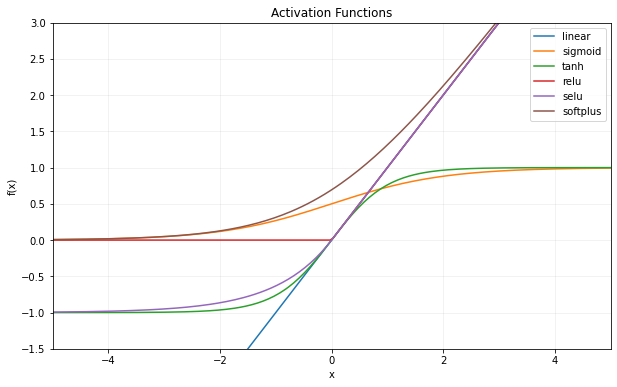

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 200)

sigmoid = 1/(1+np.exp(-x))
tanh = np.tanh(x)
relu = np.where(x > 0, x, 0)
selu = np.where(x > 0, x, np.exp(x)-1)
softplus = np.log(1+np.exp(x))

plt.figure(figsize=(10,6))

plt.plot(x, x, label='linear')
plt.plot(x, sigmoid, label='sigmoid')
plt.plot(x, tanh, label='tanh')
plt.plot(x, relu, label='relu')
plt.plot(x, selu, label='selu')
plt.plot(x, softplus, label='softplus')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Activation Functions')
plt.xlim(x[0], x[-1])
plt.ylim(-1.5, 3)
plt.grid(alpha=0.2)
plt.legend()
plt.show()

### Universal Approximation Theorem

Under most conditions, the [universal approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem) guarantees that a feedforward neural network with one hidden layer (i.e. a shallow FNN) can find an approximate mapping between input data and targets. However, it does not specify how many units will be needed to get a satisfactory mapping. It all depends on the data!

### Training

When a network is constructed, the weights and biases are initially set to some random values near, but not exactly, zero. During the training process, the parameters change bit by bit using a method called **gradient descent**. The cost function $C(y, \hat{y})$ for supervised learning problems depends on the output of the network $y$ and the target $\hat{y}$. If we let the symbol $\alpha$ stand in for any of the parameters $W, \vec{b}, \vec{w}, c$, then...


$$\min_{\alpha} C (y, \hat{y}) 
\ \ \Longrightarrow \ \ 
\frac{\partial C(y, \hat{y})}{\partial \alpha} = \frac{\partial C(y, \hat{y})}{\partial y} \frac{\partial y}{\partial \alpha} = 0$$


A cost (or loss) function is our way of defining the grading rubric for the training of the network. For regression problems, a safe bet is mean squared error (MSE):

$$C(y, \hat{y})= \frac{1}{n} \sum_{i=1}^{n} (y_i-\hat{y}_i)^2 
\ \ \Longrightarrow \ \
\frac{\partial C(y, \hat{y})}{\partial \alpha} = \frac{2}{n}\sum_{i=1}^{n} (y_i-\hat{y}_i) \frac{\partial y_i}{\partial \alpha}
$$

For binary classification problems, binary cross-entropy has been shown to outperform MSE:

$$C(y, \hat{y})= -\frac{1}{n} \sum_{i=1}^{n} \hat{y}_i \log(y_i)+(1-\hat{y}_i) \log(1-y_i)
\ \ \Longrightarrow \ \
\frac{\partial C(y, \hat{y})}{\partial \alpha} = \frac{1}{n} \sum_{i=1}^{n} \left( -\frac{\hat{y}_i}{y_i} + \frac{1-\hat{y}_i}{1-y_i} \right) \frac{\partial y_i}{\partial \alpha}
$$

If the data set is very large, taking the sums over a smaller batch of data points will help speed up training. 

Now, say you've calculated the gradient of the cost function with respect to the parameters $\frac{\partial C(y, \hat{y})}{\partial \alpha}$. How do you change the parameters to lower the cost? You can think of this gradient as a vector pointing uphill on the surface of the cost function in parameter space. Going downhill means I want to step in the opposite direction of the gradient. Since this gradient is really just an approximation, I want to reduce my step by some factor called the learning rate $\eta$:

$$\alpha_{new} = \alpha_{old} - \eta*\frac{\partial C(y, \hat{y})}{\partial \alpha}$$

As training progresses, the learning rate decreases to allow for more fine tuning. The most popular optimization schemes involve an adaptive learning rate and/or "momentum" to help get out of local minima. [Adam](https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c) is a great first choice for the optimizer in most applications.


To get the explicit formulas for the gradient, it's helpful to write everything in index notation. Assuming we have $M$ hidden nodes and $N$ input nodes...

$$y = g(\vec{w}^T\vec{h}+c) \ \ \Longrightarrow \ \ y = g\left( \sum_{i=1}^M w_i h_i + c \right)$$
$$\vec{h} = \vec{f}(W\vec{x}+\vec{b}) \ \ \Longrightarrow \ \ h_i = f_i\left( \sum_{j = 1}^N W_{i,j} x_j + b_i \right)$$

We will take derivatives starting from the output layer:

$$ \frac{\partial y}{\partial c} = g'(\vec{w}^T\vec{h}+c) $$

$$ \frac{\partial y}{\partial w_i} = g'(\vec{w}^T\vec{h}+c) h_i $$


Then using the chain rule, we'll take derivatives for the hidden layer:

$$ \frac{\partial y}{\partial b_i} = \frac{\partial y}{\partial h_j} \frac{\partial h_j}{\partial b_i} = g'(\vec{w}^T\vec{h}+c) w_j  f'_j\left( \sum_{k = 1}^N W_{j,k} x_k + b_j \right) \delta_{i,j} =  g'(\vec{w}^T\vec{h}+c) w_i  f'_i\left( \sum_{j = 1}^N W_{i,j} x_j + b_i \right)$$

$$ \frac{\partial y}{\partial W_{i,j}} = \frac{\partial y}{\partial h_k} \frac{\partial h_k}{\partial W_{i,j}} = g'(\vec{w}^T\vec{h}+c) w_k f'_k\left( \sum_{l=1}^N W_{k,l} x_l + b_k \right) \sum_{l=1}^N \delta_{i,k} \delta_{j,l} x_l = g'(\vec{w}^T\vec{h}+c) w_i  f'_i\left( \sum_{k = 1}^N W_{i,k} x_k + b_i \right) x_j$$ 

## Implementation


Putting all this together... here is how you could implement a shallow feedforward neural network. Hopefully this helps make clear what Keras and scikit-learn are doing under the hood. 

Hidden layer activation function $f(x)$:

In [3]:
def relu(x):
        
    return np.where(x > 0, x, 0)
    
def relu_deriv(x):
        
    return np.where(x > 0, 1, 0)

Output layer activation functions $g(x)$:

In [4]:
def sigmoid(x):
        
    return 1/(1+np.exp(-x))
    
def sigmoid_deriv(x):
        
    return np.exp(-x)/(1+np.exp(-x))**2

def linear(x):
    
    return x

def linear_deriv(x):
    
    return 1

Cost functions $C(y, \hat{y})$:

In [5]:
def squared_err(y, y_hat):
    
    return (y-y_hat)**2

def squared_err_deriv(y, y_hat):
    
    return 2*(y-y_hat)

def log_loss(y, y_hat):
    
    return -y_hat*np.log(y) - (1-y_hat)*np.log(1-y)
    
def log_loss_deriv(y, y_hat):
    
    return -y_hat/(y+1E-5) + (1-y_hat)/(1-y+1E-5)

Shallow FNN with one output:

In [6]:
class FeedforwardNeuralNetwork:
    
    def __init__(self, n_inputs=1, n_hidden=10, sigma=0.1):

        # connects input layer to hidden layer
        self.W = np.random.normal(0.0, sigma, (n_hidden, n_inputs))
        self.b = np.random.normal(0.0, sigma, n_hidden)
        
        # connects hidden layer to output node
        self.w = np.random.normal(0.0, sigma, n_hidden)
        self.c = np.random.normal(0.0, sigma)
        
        # total number of parameters
        self.n_params = n_hidden*(n_inputs+2) + 1
        
        # convenient indicies to store for splitting gradient 
        self.indicies = [n_hidden*n_inputs, n_hidden*(n_inputs+1), n_hidden*(n_inputs+2)]

    
    def forward_pass(self, x):

        h = relu(np.dot(self.W, x) + self.b)
        y = sigmoid(np.inner(self.w, h) + self.c)
        
        return y
    
    
    def gradient(self, x):
        
        h = relu(np.dot(self.W, x) + self.b)
        df = relu_deriv(np.dot(self.W, x) + self.b)
        dg = sigmoid_deriv(np.inner(self.w, h) + self.c)
    
        # derivative of output w.r.t. output biases
        dy_dc = dg
        
        # derivative of output w.r.t. output weights
        dy_dw = dg*h
        
        # derivative of output w.r.t. hidden nodes (for chain rule)
        dy_dh = dg*self.w
        
        # derivative of output w.r.t. hidden biases
        dy_db = np.multiply(dy_dh, df)
        
        # derivative of output w.r.t. hidden weights
        dy_dW = np.outer(np.multiply(dy_dh, df), x)
    
        return np.concatenate((dy_dW, dy_db, dy_dw, dy_dc), axis=None)
    
    
    def update_params(self, gradient, learning_rate):
        
        # split gradient into subarrays
        dW, db, dw, dc = np.split(gradient, self.indicies)
        
        self.W -= learning_rate*dW.reshape(self.W.shape)
        self.b -= learning_rate*db
        self.w -= learning_rate*dw
        self.c -= learning_rate*dc[0]
    
    
    def fit(self, X_train, y_train, n_epochs=1000, learning_rate=0.001, decay=0.01):
        
        # total number of training data points
        n_train = X_train.shape[0]
        
        print("{:>10s} {:>10s} {:>10s}".format("Epoch", "Cost", "||Grad||"))
        
        # for storing cost and ||grad|| during training
        training = np.empty((n_epochs+1, 2))
        
        # loop over training epochs
        for epoch in range(n_epochs+1):
            
            cost = 0.0
            grad = np.zeros(self.n_params)

            for i in range(n_train):

                # output of network
                y = self.forward_pass(X_train[i])

                # calculate cost
                cost += log_loss(y, y_train[i])

                # calculate gradient of cost w.r.t. parameters
                grad += log_loss_deriv(y, y_train[i])*FNN.gradient(X_train[i])


            # take average
            cost /= n_train
            grad /= n_train
            
            # store
            training[epoch, 0] = cost
            training[epoch, 1] = np.linalg.norm(grad)
            
            # print updates
            if epoch%100 == 0:
                print("{:10d} {:10f} {:10f}".format(epoch, cost, np.linalg.norm(grad)))
            
            # gradient descent with decaying learning rate
            self.update_params(grad, learning_rate/(1+decay*epoch))
        
        return pd.DataFrame(training, columns=['Cost', 'Gradient'])
            
    
    def predict(self, X_test):
        
        n_test = X_test.shape[0]
        y_pred = np.empty(n_test)
        
        for i in range(n_test):
            y_pred[i] = self.forward_pass(X_test[i])
        
        return y_pred

This code is just for your reference. We will be using Keras to build our networks to take advantage of all the different options it provides.